In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import astropy
from astropy.io import fits

In [2]:
filters=['vv','bb','uu','w1','m2','w2']
#filters=['w2']
comps=['1','2','3','4','5','6','7','8','9','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19']
#comps=['08','09','10','11','12','13','14','15','16','17','18','19']
#comps=['07']#,'08']#,'09']#,'10']#,'11','12','13']#,'14','15','16','17','18','19']
#fields=['SN2005am','SN2005cf','SN2006X','SN2006aj','SN2006jc','SN2007cv','SN2007on','SN2007pk','SN2009ig','SN2010al','SN2011by','SN2011hw','SN2011iw','SN2012fr','LSQ13cuw','SN2016gxp','SN2018aoz','SN2018xx','SN2018hna','SN2019hgp','SN2019np','SN2019wep','SN2019yvq','SN2020hvf','SN2021csp','SN2021yja'] 
fields=['SN2020nxt','SN2020hvf'] 
#fields=['SN2006jc','SN2006aj','M51'] 
#fields=['SN2019np','SN2019wep','SN2019yvq'] 
colors=['#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a']
#centroidcolors=['#73a2c6', '#f4777f', '#93003a','#00429d']
#colors=['blue','green', 'red', 'purple']
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.style.use('classic')

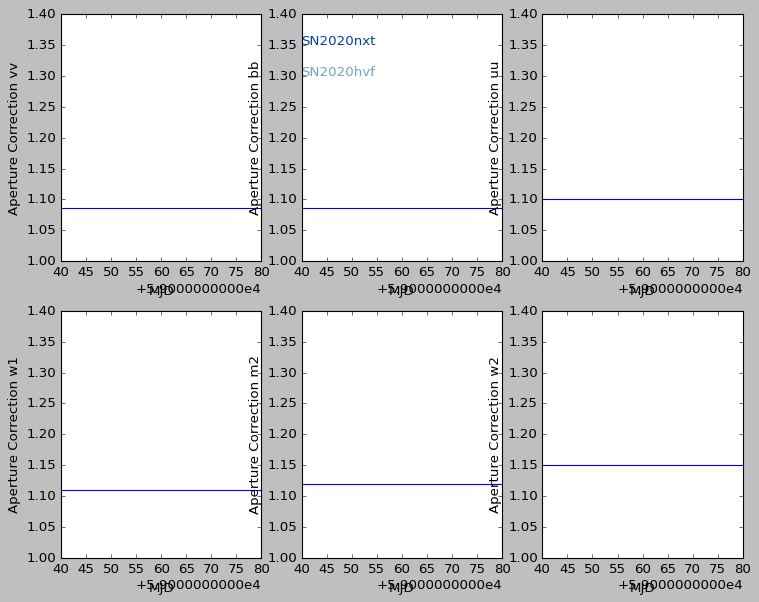

In [3]:
apcor=[1.086,1.086,1.10,1.11,1.12,1.15]

xrange=[59040.0,59080.0]
fig = plt.figure(figsize=(11, 8.5))


for filter in filters:
    #print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]
    ax = fig.add_subplot(2,3, index+1)
    #plt.scatter([mjd],[cr3])
    ax.set_xlabel('MJD')

    ax.set_ylabel('Aperture Correction '+filter)
    ax.axis([xrange[0],xrange[1],1.0,1.4])
    hdul=fits.open('swusenscorr20041120v006.fits')
    data=hdul[index+1].data
    time=data['TIME']
    uvotoffset=data['OFFSET']
    
    uvotmjd=time/60/60/24.0+51910.0
    ax.plot(xrange,apcorline)
    
    #print(filter)
    for field in fields:
        #print(field)
        fieldindex=fields.index(field)
        if index==1: 
            ax.text(xrange[0], 1.35-fieldindex*0.05, field, fontsize=12, color=colors[fieldindex])
        for comp in comps:
 
            #print(comp)
            file='compdata/'+field+'_'+filter+'_3_5_comp'+comp+'.dat'
            mjd=[]
            cr3=[]
            cr3e=[]
            cr5=[]
            cr5e=[]
            cr3earlymean=[]
            cr5earlymean=[]
            if os.path.exists(file):
                #print(comp)
                f = open(file, 'r')
                for line in f:
                    columns=line.split()
                    mjd.append(columns[1])
                    cr3.append(columns[2])
                    cr3e.append(columns[3])
                    cr5.append(columns[4])
                    cr5e.append(columns[5])
                f.close()
                mjd=np.array(mjd, dtype=np.float32)
                cr3=np.array(cr3, dtype=np.float32)
                cr5=np.array(cr5, dtype=np.float32)
                cr3e=np.array(cr3e, dtype=np.float32)
                cr5e=np.array(cr5e, dtype=np.float32)
                earliest=np.min(mjd)
                early=[]
                #early=np.where(mjd<(earliest+80.0))
                early=np.where(mjd<54050)
                if len(early[0])>3:
                    earlymean=np.mean(cr5[early])
                    earlystd=np.std(cr5[early])
                    earlyfiltered=[e for e in cr5[early] if (earlymean - 2*earlystd < e < earlymean + 2*earlystd)]
                    cr3earlymean=stats.mean(cr3[early])
                    cr5earlymean=stats.mean(earlyfiltered)
                    cr5earlystdev=np.std(earlyfiltered)
                    #print(cr5earlymean)
                    #print(cr5earlystdev)
                    highenough=np.where(cr5 > 0.2)

                    nottoohigh=np.where(cr5 < 2.5)

                    high=np.where(cr5/cr5e > 40)

                    #print(cr3/cr3e)
                    close=np.where(abs(cr5-stats.mean(cr5))<2.0*np.std(cr5))
                    #print(high and close)
                    #print(abs(cr3-stats.mean(cr3))<3*np.std(cr3))
                    #cr3[good]/cr3e[good]
                    #print(cr3[high and close])
                    good=high #and highenough and nottoohigh  #and close
                    if cr5earlymean<5:
                        #plt.errorbar(mjd, cr5/cr5earlymean, cr5e/cr5earlymean, marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])
                        ax.errorbar(mjd[good], cr5[good]/cr3[good], cr5e[good]/cr3[good], marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])
                 
plt.savefig('UVOTapcorstd.eps', dpi=300, bbox_inches='tight')
plt.show()
    #
          


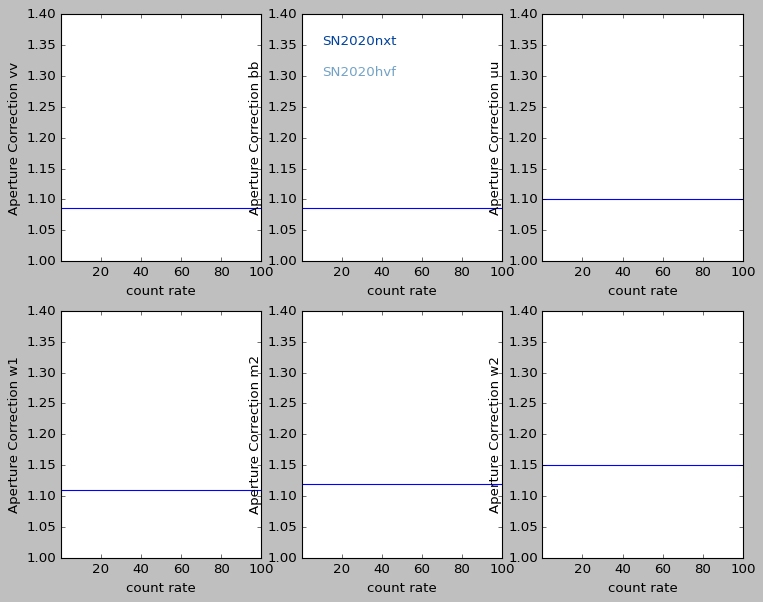

In [4]:


fig = plt.figure(figsize=(11, 8.5))



for filter in filters:
    #print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]
    ax = fig.add_subplot(2,3, index+1)
    #plt.scatter([mjd],[cr3])
    ax.set_xlabel('count rate')

    ax.set_ylabel('Aperture Correction '+filter)
    ax.axis([0.001,100,1.0,1.4])
    hdul=fits.open('swusenscorr20041120v006.fits')
    data=hdul[index+1].data
    time=data['TIME']
    uvotoffset=data['OFFSET']
    uvotmjd=time/60/60/24.0+51910.0
    ax.plot([0.001,100],apcorline)
    
    #print(filter)
    for field in fields:
        #print(field)
        fieldindex=fields.index(field)
        if index==1: 
            ax.text(10, 1.35-fieldindex*0.05, field, fontsize=12, color=colors[fieldindex])
        for comp in comps:
 
            #print(comp)
            file='compdata/'+field+'_'+filter+'_3_5_comp'+comp+'.dat'
            mjd=[]
            cr3=[]
            cr3e=[]
            cr5=[]
            cr5e=[]
            cr3earlymean=[]
            cr5earlymean=[]
            if os.path.exists(file):
                #print(comp)
                f = open(file, 'r')
                for line in f:
                    columns=line.split()
                    mjd.append(columns[1])
                    cr3.append(columns[2])
                    cr3e.append(columns[3])
                    cr5.append(columns[4])
                    cr5e.append(columns[5])
                f.close()
                mjd=np.array(mjd, dtype=np.float32)
                cr3=np.array(cr3, dtype=np.float32)
                cr5=np.array(cr5, dtype=np.float32)
                cr3e=np.array(cr3e, dtype=np.float32)
                cr5e=np.array(cr5e, dtype=np.float32)
                earliest=np.min(mjd)
                early=[]
                #early=np.where(mjd<(earliest+80.0))
                early=np.where(mjd<54050)
                if len(early[0])>3:
                    earlymean=np.mean(cr5[early])
                    earlystd=np.std(cr5[early])
                    earlyfiltered=[e for e in cr5[early] if (earlymean - 2*earlystd < e < earlymean + 2*earlystd)]
                    cr3earlymean=stats.mean(cr3[early])
                    cr5earlymean=stats.mean(earlyfiltered)
                    cr5earlystdev=np.std(earlyfiltered)
                    #print(cr5earlymean)
                    #print(cr5earlystdev)
                    highenough=np.where(cr5 > 0.2)

                    nottoohigh=np.where(cr5 < 2.5)

                    high=np.where(cr5/cr5e > 40)

                    #print(cr3/cr3e)
                    close=np.where(abs(cr5-stats.mean(cr5))<2.0*np.std(cr5))
                    #print(high and close)
                    #print(abs(cr3-stats.mean(cr3))<3*np.std(cr3))
                    #cr3[good]/cr3e[good]
                    #print(cr3[high and close])
                    good=high #and highenough and nottoohigh  #and close
                    if cr5earlymean<5:
                        #plt.errorbar(mjd, cr5/cr5earlymean, cr5e/cr5earlymean, marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])
                        ax.errorbar(cr5[good], cr5[good]/cr3[good], cr5e[good]/cr3[good], marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])
                 
plt.savefig('UVOTapcorcr.eps', dpi=300, bbox_inches='tight')
plt.show()
    #
          

